## Milestone 3 II4035

By: Samuel Eric Yonatan - 18221133

Subtopic: fraud detection in mobile money transaction app

Data source: https://www.kaggle.com/datasets/ealaxi/paysim1?select=PS_20174392719_1491204439457_log.csv

In [281]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading a CSV file containing a dataset
df = pd.read_csv('./mobile_money_transaction.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Description

In [282]:
# The dataset has 6,362,620 rows and 11 columns.
df.shape

(6362620, 11)

In [283]:
# The dataset contains data types such as integer, string (object), and float.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [284]:
# There is a typo in the attribute name, which should be "oldbalanceOrig" instead of "oldbalanceOrg."

df.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'}, inplace=True)
df.columns

# The attribute "oldbalanceOrg" has been successfully changed to "oldbalanceOrig."

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

Dataset columns
- step: the time elapsed for the transaction, in hours
- type: transaction type (cash out, cash in, debit, payment, transfer)
- amount: the amount of money involved in the transaction
- nameOrig: the customer who initiated the transaction
- oldbalanceOrig: the customer's balance before the transaction
- newbalanceOrig: the customer's balance after the transaction
- nameDest: the recipient of the transaction
- oldbalanceDest: the recipient's balance before the transaction
- newbalanceDest: the recipient's balance after the transaction
- isFraud: identification of fraudulent transactions (1 if fraud, 0 if not fraud)
- isFlaggedFraud: system identification of fraud in the transaction

In [285]:
df[['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()

# The attributes "isFraud" and "isFlaggedFraud" do not need to be subjected to statistical analysis because they only have values of 0 and 1, which represent non-fraudulent and fraudulent transactions, respectively.

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [286]:
# For the transaction types, there are "cash out," "payment," "cash in," "transfer," and "debit."
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

## Data Quality Verification

In [287]:
# To identify missing data
df.isnull().sum()

# There is no missing or null data in the dataset.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [288]:
# To identify the presence of missing data (if missing data is represented by '?'):
for i in range(len(df.columns)):
  print('Attribute-', i + 1, ': ', df.columns[i], ', Number of ?: ', df[df[df.columns[i]] == '?'].shape[0])

# There is no missing or null data in the dataset.

Attribute- 1 :  step , Number of ?:  0
Attribute- 2 :  type , Number of ?:  0
Attribute- 3 :  amount , Number of ?:  0
Attribute- 4 :  nameOrig , Number of ?:  0
Attribute- 5 :  oldbalanceOrig , Number of ?:  0
Attribute- 6 :  newbalanceOrig , Number of ?:  0
Attribute- 7 :  nameDest , Number of ?:  0
Attribute- 8 :  oldbalanceDest , Number of ?:  0
Attribute- 9 :  newbalanceDest , Number of ?:  0
Attribute- 10 :  isFraud , Number of ?:  0
Attribute- 11 :  isFlaggedFraud , Number of ?:  0


In [289]:
# To identify imbalanced data based on the "isFraud" attribute:
print('No Frauds: ', round(df['isFraud'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds: ', round(df['isFraud'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

# The dataset used is imbalanced, with a much larger number of non-fraudulent transactions compared to fraudulent transactions.

No Frauds:  99.87 % of the dataset
Frauds:  0.13 % of the dataset


In [290]:
# Outliers identification
for i in (df.columns):
    if (df[i].dtypes in ['int64','float64']):
        print('\nAttribute-',i,':',df[i].dtypes)
        Q1=df[i].quantile(0.25)
        print('Q1',Q1)
        Q3=df[i].quantile(0.75)
        print('Q3',Q3)
        IQR=Q3-Q1
        print('IQR',IQR)
        min=df[i].min()
        max=df[i].max()
        min_IQR=Q1-1.5*IQR
        max_IQR=Q3+1.5*IQR
        if (min<min_IQR):
            print('Low outlier is found')
        if (max>max_IQR):
            print('High outlier is found')



Attribute- step : int64
Q1 156.0
Q3 335.0
IQR 179.0
High outlier is found

Attribute- amount : float64
Q1 13389.57
Q3 208721.4775
IQR 195331.9075
High outlier is found

Attribute- oldbalanceOrig : float64
Q1 0.0
Q3 107315.175
IQR 107315.175
High outlier is found

Attribute- newbalanceOrig : float64
Q1 0.0
Q3 144258.41
IQR 144258.41
High outlier is found

Attribute- oldbalanceDest : float64
Q1 0.0
Q3 943036.7075
IQR 943036.7075
High outlier is found

Attribute- newbalanceDest : float64
Q1 0.0
Q3 1111909.25
IQR 1111909.25
High outlier is found

Attribute- isFraud : int64
Q1 0.0
Q3 0.0
IQR 0.0
High outlier is found

Attribute- isFlaggedFraud : int64
Q1 0.0
Q3 0.0
IQR 0.0
High outlier is found


## Data Exploration

In [291]:
# Identify transactions that are fraudulent but are not classified as fraud by the system
df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 0)]

# There are 8197 data points that are fraudulent but are not flagged as fraud by the system.

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [292]:
# Identify the number of fraudulent transactions based on each transaction type:
df.groupby('type')['isFraud'].sum()

# Only the transaction types "cash out" and "transfer" have fraudulent transactions.

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

In [293]:
# Identify transactions with an amount less than or equal to 0:
print('Number of transactions with amount < 0: ', len(df[df['amount'] < 0]))
print('Number of transactions amount = 0: ', len(df[df['amount'] == 0]))

# There are 16 transactions with an amount equal to 0.

Number of transactions with amount < 0:  0
Number of transactions amount = 0:  16


In [294]:
# Identify whether all transactions with an amount equal to 0 are considered fraud:
df[df['amount'] == 0]['isFraud'].value_counts()[1] == len(df[df['amount'] == 0])

# All transactions with an amount equal to 0 are considered fraud.

True

Text(0.5, 1.0, 'Number of Transactions for Every Type')

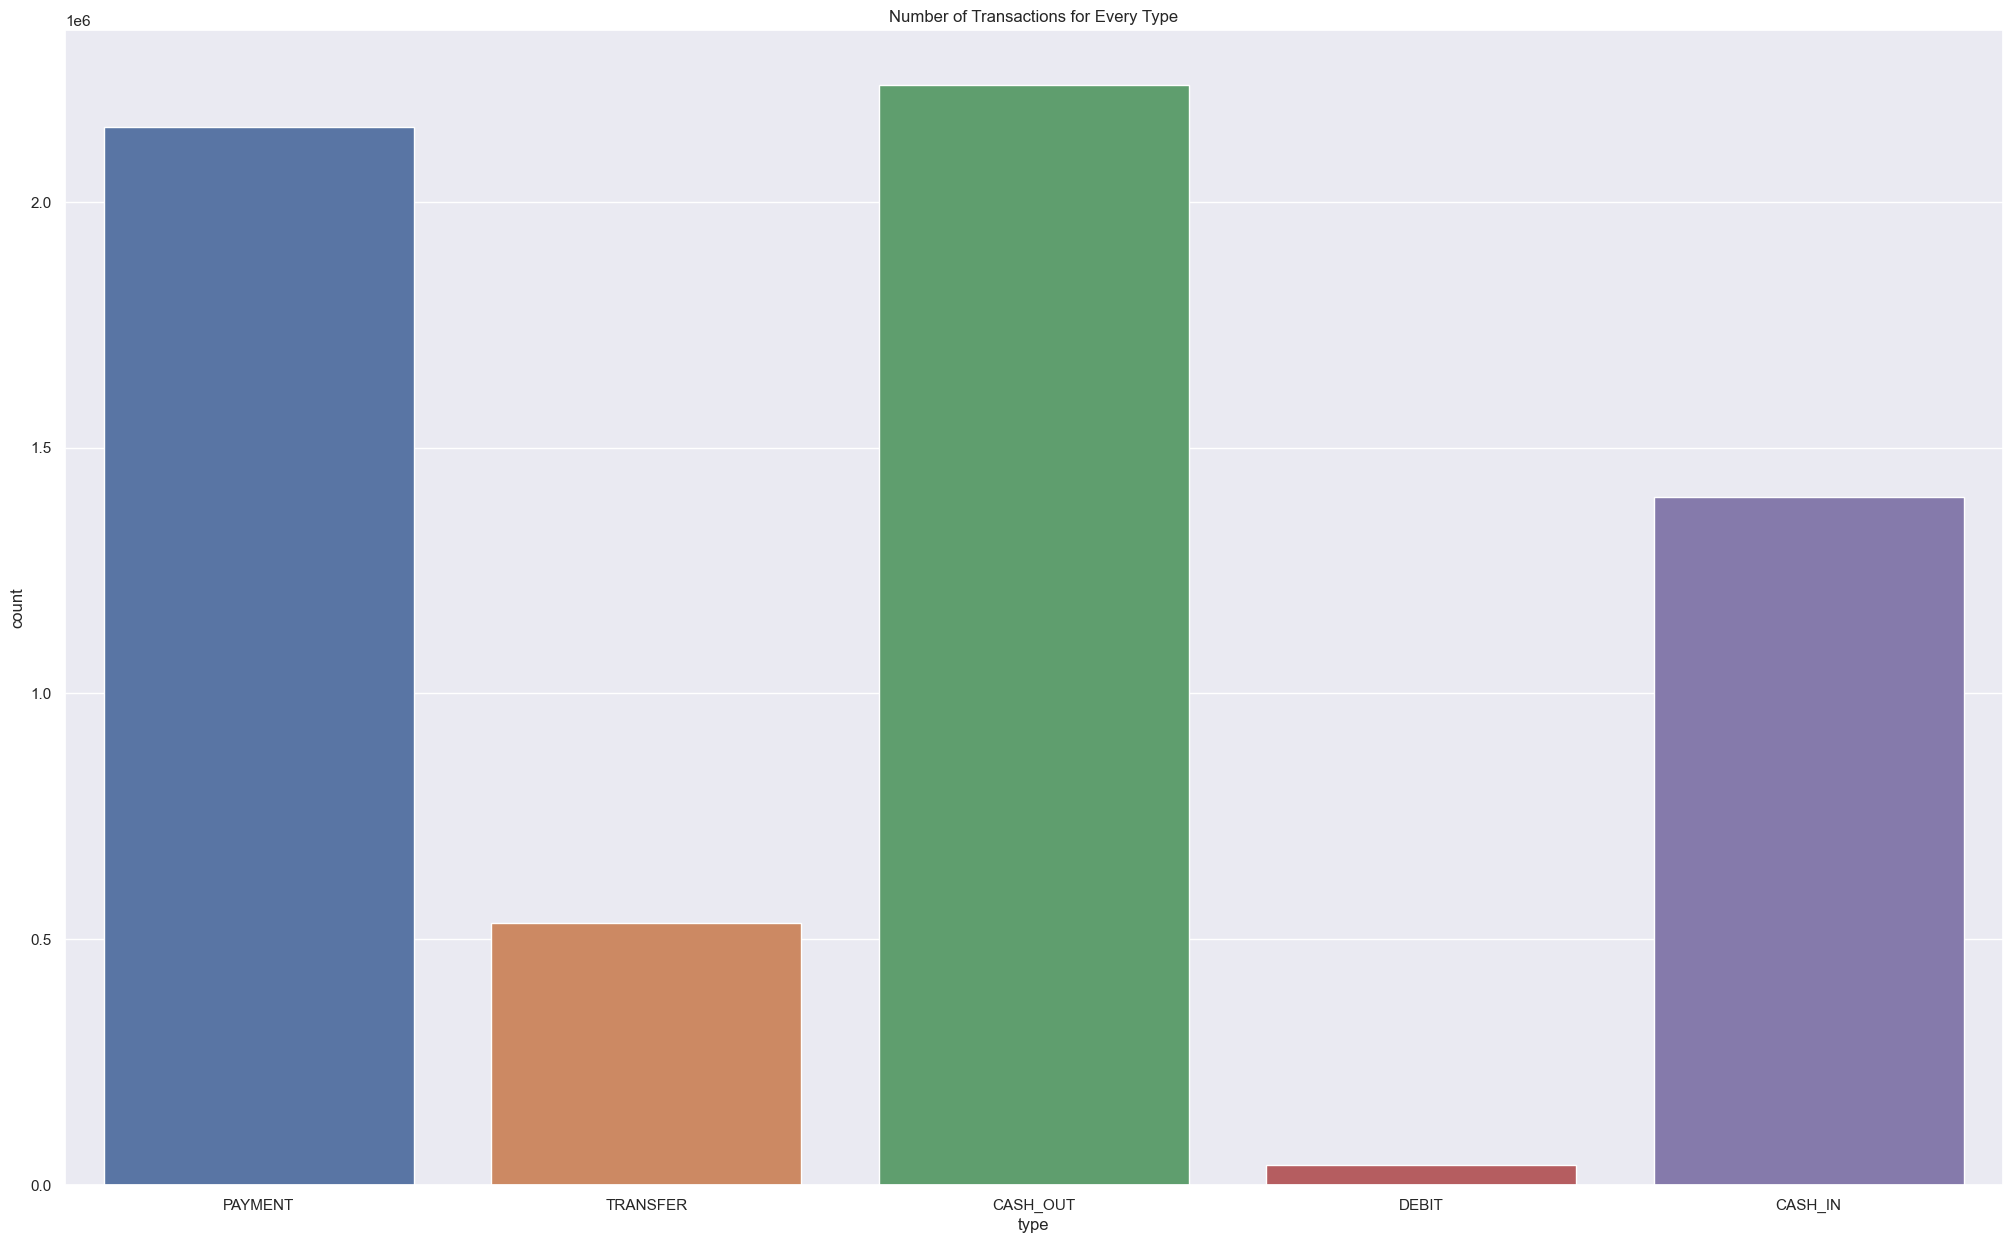

In [295]:
sns.countplot(data=df, x='type')
plt.title('Number of Transactions for Every Type')

# From the graph below, it can be seen that the transaction types with the most transactions are "payment" and "cash out."

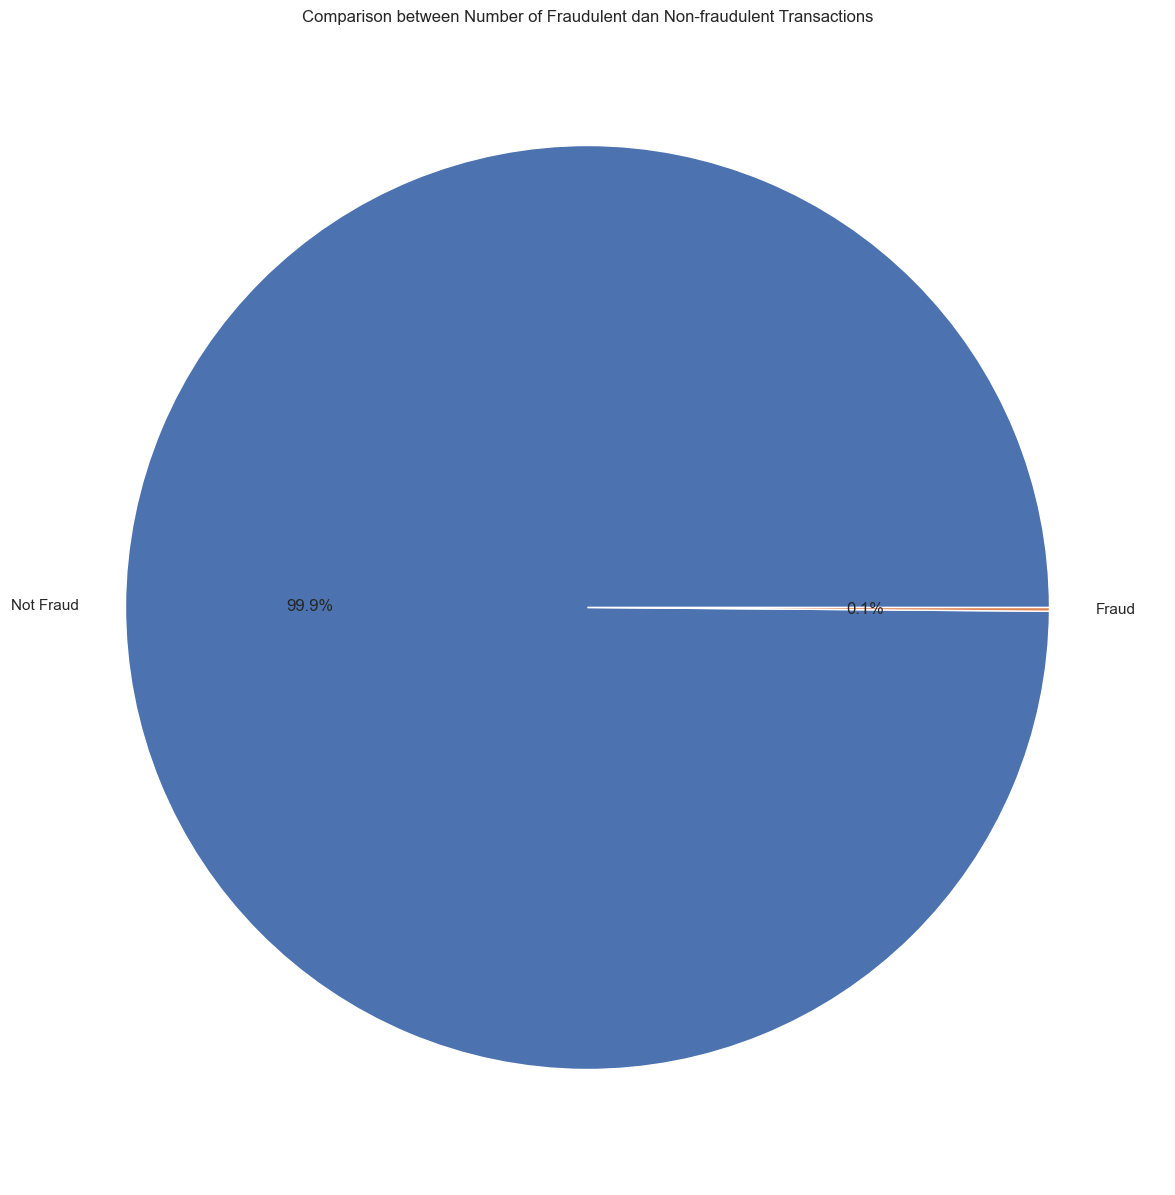

In [296]:
df_fraud = pd.DataFrame({
  'isFraud': ['Not Fraud', 'Fraud'],
  'count': [len(df) - df.groupby('isFraud')['isFraud'].sum().values[1], df.groupby('isFraud')['isFraud'].sum().values[1]]
})
# df_fraud
plt.pie(df_fraud['count'], labels=df_fraud['isFraud'], autopct='%1.1f%%')
plt.title('Comparison between Number of Fraudulent dan Non-fraudulent Transactions')
plt.show()

# From the graph below, it can be seen that the number of fraudulent transactions is very small compared to the number of non-fraudulent transactions.

Text(0.5, 1.0, 'Comparison between Number of Fraudulent Transactions per Type')

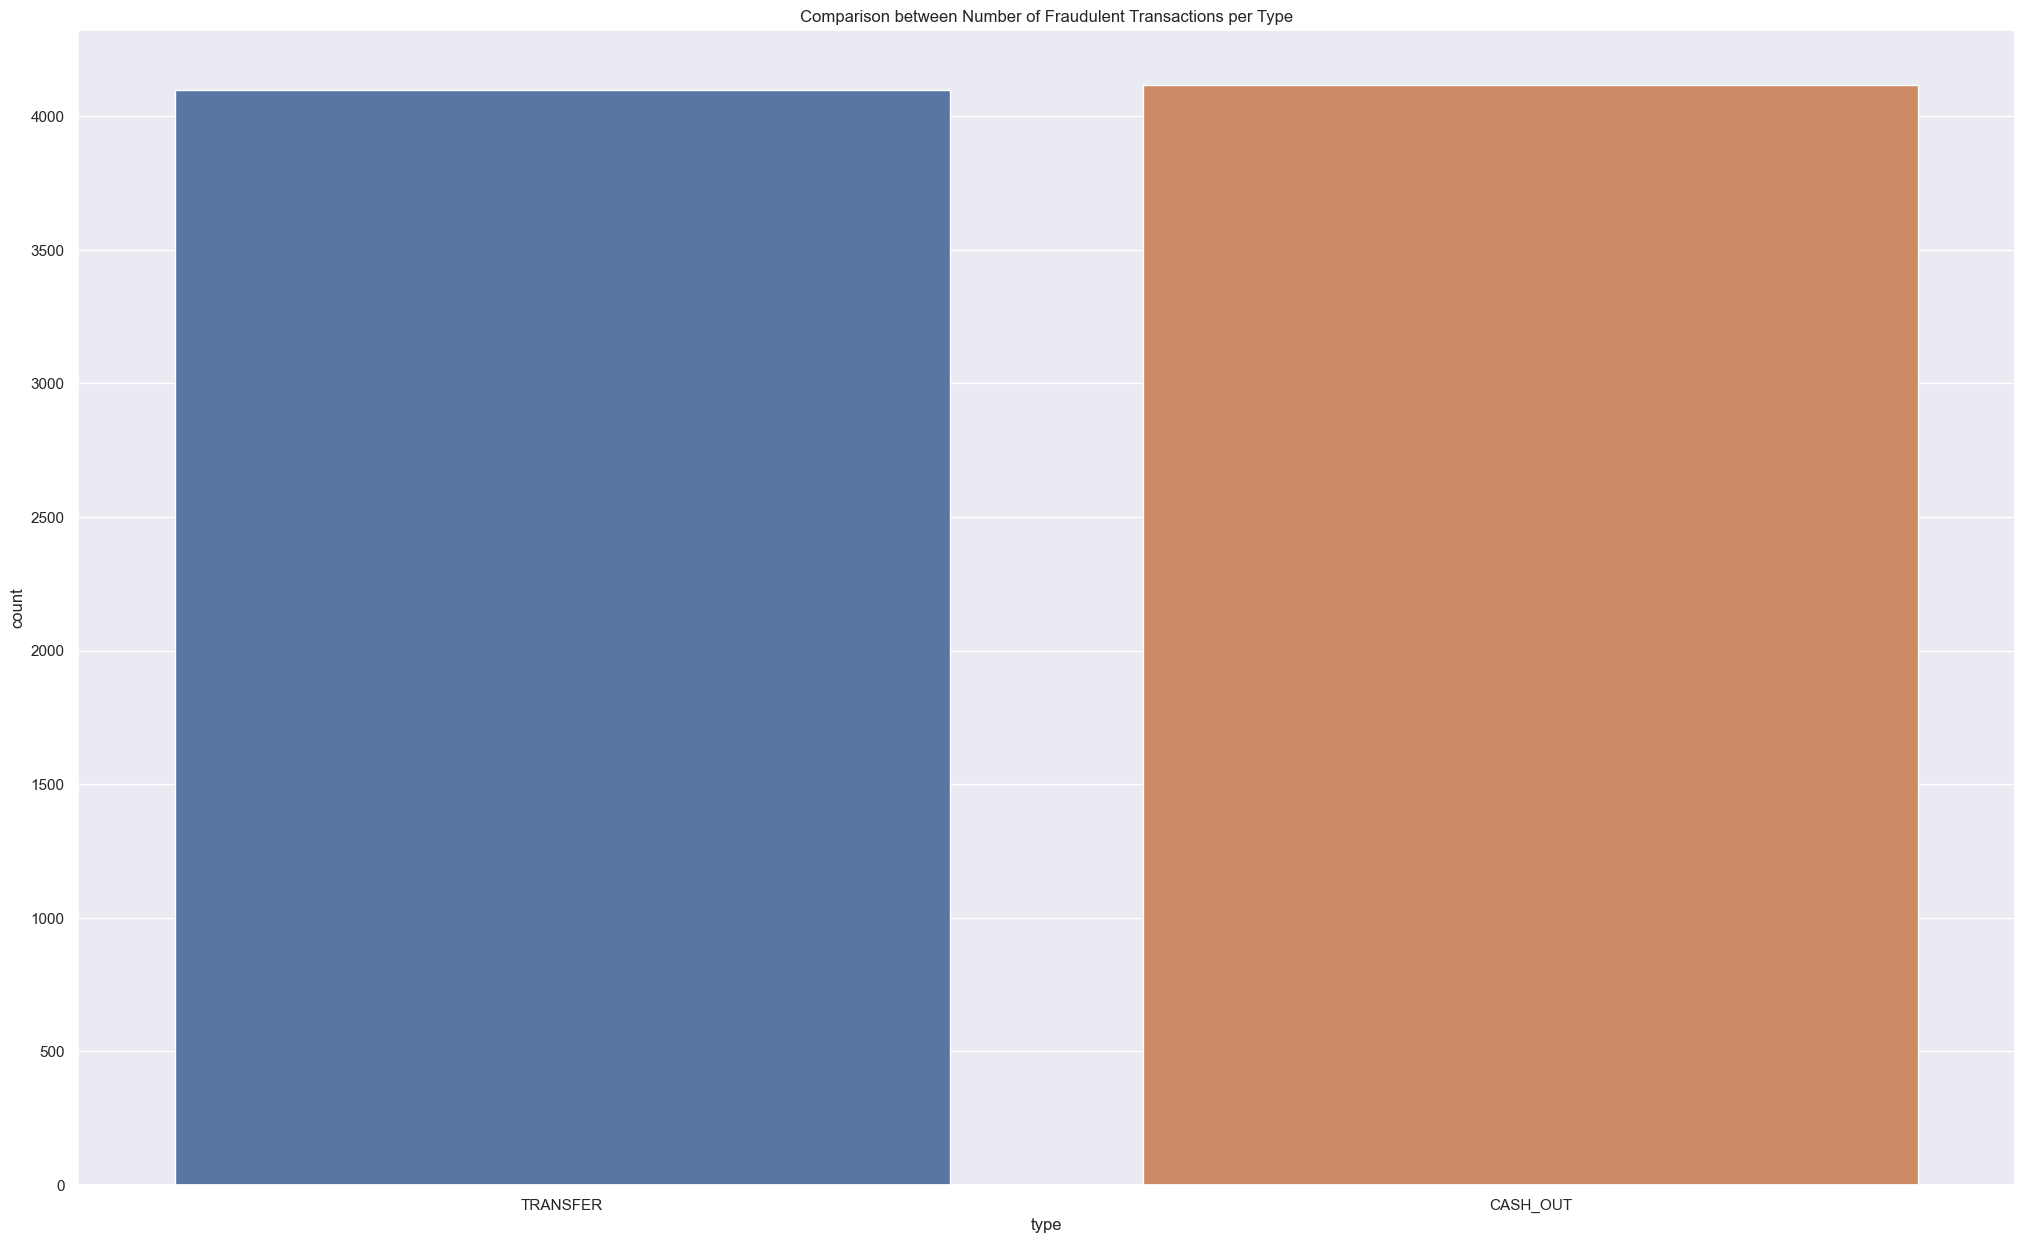

In [297]:
df_fraud_type = df[df['isFraud'] == 1]
sns.countplot(data=df_fraud_type, x='type')
plt.title('Comparison between Number of Fraudulent Transactions per Type')

# From the graph below, the number of fraudulent transactions is roughly evenly split between two types, namely transfer and cash out.

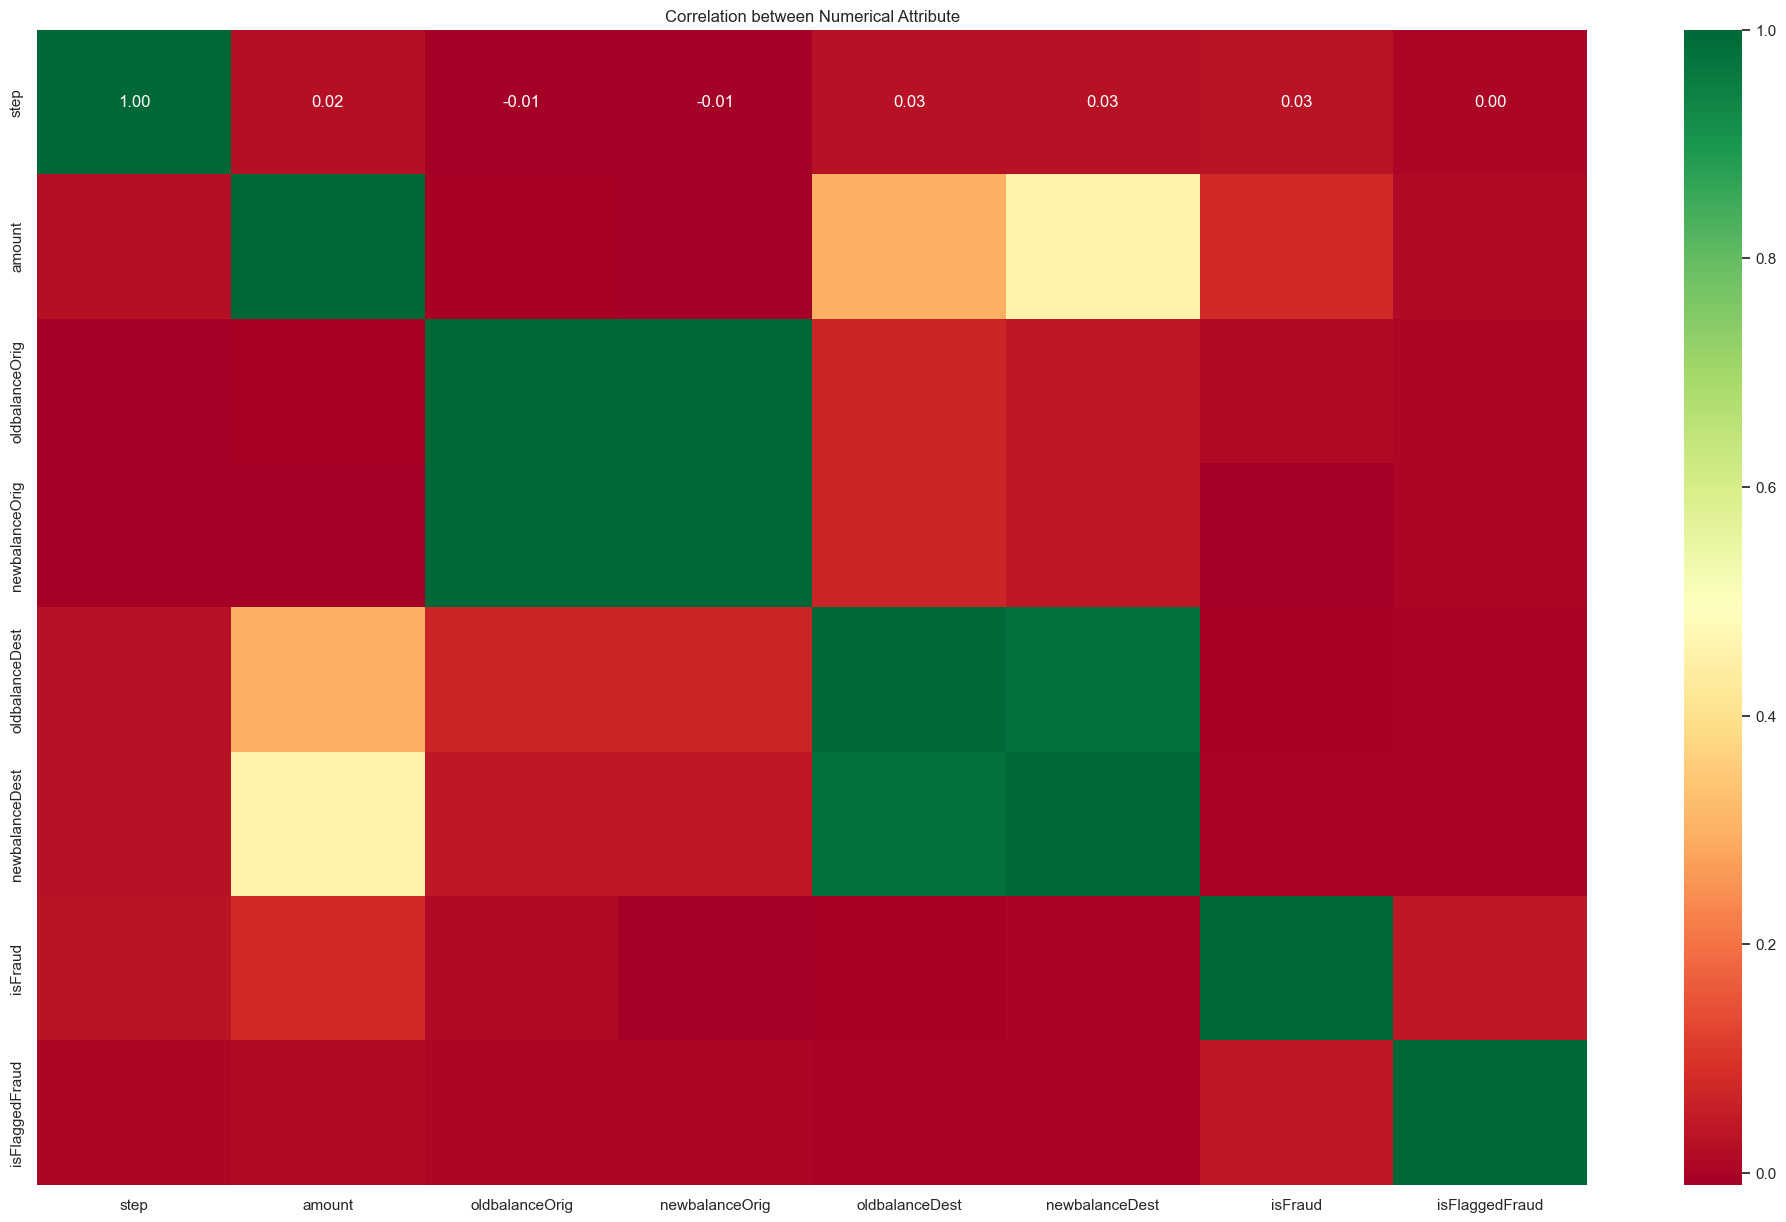

In [298]:
df_temp = df.select_dtypes(include=['int64', 'float64'])
corr = df_temp.corr()

sns.set(rc={'figure.figsize': (25, 15)})
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation between Numerical Attribute')
plt.show()

# From the graph below, it can be seen that "oldbalanceDest" and "newbalanceDest" are correlated, as well as "oldbalanceOrig" and "newbalanceOrig" which are also correlated.

## Next Steps

Here are the next steps that can be taken:

1. Remove some attributes because there are some attributes that are correlated.
2. Sample the non-fraudulent transactions to balance the number of fraudulent and non-fraudulent transactions.

## Data Preparation

### Cleansing Data

There are no data with empty values, and all data already have the correct data types.

### Data Formatting

All attributes in the dataset do not need to be encoded because they already have the correct data types.

In [300]:
# Since only transfer and cash-out transactions have fraud transactions, other transaction types that are not transfer and cash-out are mapped to other types.

type_map = {
  'PAYMENT':'OTHERS',
  'TRANSFER':'TRANSFER',
  'CASH_OUT':'CASH_OUT',
  'DEBIT':'OTHERS',
  'CASH_IN':'OTHERS'
}

df['type'] = df['type'].map(type_map)

In [301]:
# Perform one-hot encoding on a transaction type attribute to make it numeric

from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()
results = pd.DataFrame(oh_enc.fit_transform(df[['type']]).toarray(), columns=['type_cash_out', 'type_others', 'type_transfer'])
df = pd.concat([df, results], axis=1)
df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_cash_out,type_others,type_transfer
0,1,OTHERS,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.0,1.0,0.0
1,1,OTHERS,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.0,1.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1.0,0.0,0.0
4,1,OTHERS,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1.0,0.0,0.0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.0,0.0,1.0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1.0,0.0,0.0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.0,0.0,1.0


### Handling Imbalanced Data

In [302]:
# Since non-fraudulent transactions outnumber fraudulent transactions, undersampling will be performed on non-fraudulent transactions to balance the number of fraudulent and non-fraudulent transactions.

class_fraud = df[df['isFraud'] == 1]
class_not_fraud = df[df['isFraud'] == 0]

class_not_fraud_under = class_not_fraud.sample(class_fraud.shape[0])
new_df = pd.concat([class_not_fraud_under, class_fraud], axis=0)
new_df['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

### Feature Engineering

#### Feature Transformation/Generation

In [303]:
# Creating a new attribute that describes the balance inaccuracy between origin, destination, and amount.

new_df['balanceOrig_inacc'] = ((new_df['oldbalanceOrig'] - new_df['amount']) != new_df['newbalanceOrig']).astype(int)
new_df['balanceDest_inacc'] = ((new_df['oldbalanceDest'] + new_df['amount']) != new_df['newbalanceDest']).astype(int)
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_cash_out,type_others,type_transfer,balanceOrig_inacc,balanceDest_inacc
4007617,298,CASH_OUT,68510.84,C1796602583,0.00,0.00,C946478744,94905.18,163416.02,0,0,1.0,0.0,0.0,1,0
5514856,380,OTHERS,235985.21,C1962683524,16357088.37,16593073.57,C1327114391,2705388.74,2738595.79,0,0,0.0,1.0,0.0,1,1
3508364,259,OTHERS,98199.32,C114887035,997005.61,1095204.93,C1101747981,284429.97,186230.65,0,0,0.0,1.0,0.0,1,1
158351,12,OTHERS,70215.32,C1380243288,1043638.45,1113853.76,C276040640,2403966.87,2472523.45,0,0,0.0,1.0,0.0,1,1
4744542,332,OTHERS,13815.51,C1050334913,10794.00,0.00,M1594671006,0.00,0.00,0,0,0.0,1.0,0.0,1,1


#### Feature Selection

In [304]:
# Checking the correlation of each attribute to select attributes that can be good features for the model to be built.

corr = new_df.select_dtypes(['int64', 'float64']).corr()
corr

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_cash_out,type_others,type_transfer,balanceOrig_inacc,balanceDest_inacc
step,1.000000,0.151872,0.076318,-0.020512,-0.005694,0.029795,0.326018,0.037453,0.040497,-0.195862,0.149259,-0.271555,-0.071890
amount,0.151872,1.000000,0.647734,0.123677,-0.010546,0.255742,0.348554,0.068176,0.048255,-0.254013,0.198204,-0.232379,-0.075091
oldbalanceOrig,0.076318,0.647734,1.000000,0.826237,0.023946,0.139067,0.125224,0.062828,-0.096301,0.039072,0.065983,-0.027821,0.063408
newbalanceOrig,-0.020512,0.123677,0.826237,1.000000,0.058199,0.021753,-0.130652,0.090235,-0.175398,0.242953,-0.049288,0.182070,0.135311
oldbalanceDest,-0.005694,-0.010546,0.023946,0.058199,1.000000,0.917560,-0.076714,-0.007628,0.111727,-0.029042,-0.092622,0.104023,-0.057563
newbalanceDest,0.029795,0.255742,0.139067,0.021753,0.917560,1.000000,0.015214,-0.010558,0.220706,-0.107983,-0.133037,0.024847,-0.161794
isFraud,0.326018,0.348554,0.125224,-0.130652,-0.076714,0.015214,1.000000,0.031225,0.153055,-0.624713,0.450142,-0.839796,-0.100173
isFlaggedFraud,0.037453,0.068176,0.062828,0.090235,-0.007628,-0.010558,0.031225,1.000000,-0.026872,-0.019507,0.048411,0.035849,0.020715
type_cash_out,0.040497,0.048255,-0.096301,-0.175398,0.111727,0.220706,0.153055,-0.026872,1.000000,-0.537615,-0.555080,-0.079553,-0.649275
type_others,-0.195862,-0.254013,0.039072,0.242953,-0.029042,-0.107983,-0.624713,-0.019507,-0.537615,1.000000,-0.402945,0.434914,0.406797


In [305]:
# The selected attributes to become features are those that are correlated with the isFraud attribute and not correlated with other attributes. These attributes are type_cash_out, type_others, type_transfer, step, amount, oldbalanceOrig, newbalanceDest, balanceDest_inacc, balanceOrig_inacc, and isFraud as the attribute to be predicted.

new_df = new_df[['type_cash_out', 'type_others', 'type_transfer', 'step', 'amount', 'oldbalanceOrig', 'newbalanceDest', 'balanceDest_inacc', 'balanceOrig_inacc', 'isFraud']]
new_df

,type_cash_out,type_others,type_transfer,step,amount,oldbalanceOrig,newbalanceDest,balanceDest_inacc,balanceOrig_inacc,isFraud
4007617,1.0,0.0,0.0,298,68510.84,0.00,163416.02,0,1,0
5514856,0.0,1.0,0.0,380,235985.21,16357088.37,2738595.79,1,1,0
3508364,0.0,1.0,0.0,259,98199.32,997005.61,186230.65,1,1,0
158351,0.0,1.0,0.0,12,70215.32,1043638.45,2472523.45,1,1,0
4744542,0.0,1.0,0.0,332,13815.51,10794.00,0.00,1,1,0
...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.0,0.0,743,339682.13,339682.13,339682.13,0,0,1
6362616,0.0,0.0,1.0,743,6311409.28,6311409.28,0.00,1,0,1
6362617,1.0,0.0,0.0,743,6311409.28,6311409.28,6379898.11,1,0,1
6362618,0.0,0.0,1.0,743,850002.52,850002.52,0.00,1,0,1


## Modelling

### Data Split

In [306]:
# Data is split into testing data and training data, with the training data size being 70% of the total data.

from sklearn.model_selection import train_test_split

X = new_df.drop('isFraud', axis=1)
y = new_df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print('Number of training data: ', len(X_train))
print('Number of testing data: ', len(X_test))

Number of training data:  11498
Number of testing data:  4928


In [307]:
# Import the required library to measure the performance of the machine learning model created.

from sklearn import metrics

### k-NN Classifier

In [308]:
# Using the k-NN classifier method to predict the classification of the isFraud attribute

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', score)

Accuracy:  0.9458198051948052


In [309]:
print('Classification Report: \n\n', metrics.classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.97      0.93      0.94      2470
           1       0.93      0.97      0.95      2458

    accuracy                           0.95      4928
   macro avg       0.95      0.95      0.95      4928
weighted avg       0.95      0.95      0.95      4928



### Decision Tree Classifier

In [310]:
# Using the decision tree classifier method to predict the classification of the isFraud attribute

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
  max_depth=None,
  min_samples_split=2
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', score)

Accuracy:  0.994926948051948


In [311]:
print('Classification Report: \n\n', metrics.classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2470
           1       0.99      1.00      0.99      2458

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



### Naive Bayes Classifier

In [312]:
# Using the naive Bayes classifier method to predict the classification of the isFraud attribute

from sklearn import naive_bayes

nb = naive_bayes.BernoulliNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', score)

Accuracy:  0.9786931818181818


In [313]:
print('Classification Report: \n\n', metrics.classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2470
           1       0.97      0.99      0.98      2458

    accuracy                           0.98      4928
   macro avg       0.98      0.98      0.98      4928
weighted avg       0.98      0.98      0.98      4928



**Conclusion**: The best accuracy and F1 score were achieved using the Decision Tree Classifier method, with an accuracy and F1 score of 0.99.